### Student Exam Score Prediction


__This project aims to predict students' exam scores based on features such as the number of hours studied, previous exam scores, and attendance. Regression techniques will be used to build a model that estimates the exam score of a student given these input features. The project can provide insights into factors influencing student performance and help educators identify students who may need additional support.__

### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset 

In [2]:
# Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
print("The data has been successfully imported")
df

The data has been successfully imported


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


### Basic Information

In [5]:
# Basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.shape

(6607, 20)

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Data Cleaning

__Check missing values__

In [8]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


### Fill missing values

In [10]:
# Fill missing values
df['Hours_Studied'] = df['Hours_Studied'].fillna(df['Hours_Studied'].mean())
df['Previous_Scores'] = df['Previous_Scores'].fillna(df['Previous_Scores'].mean())
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


### Feature Correlation Heatmap

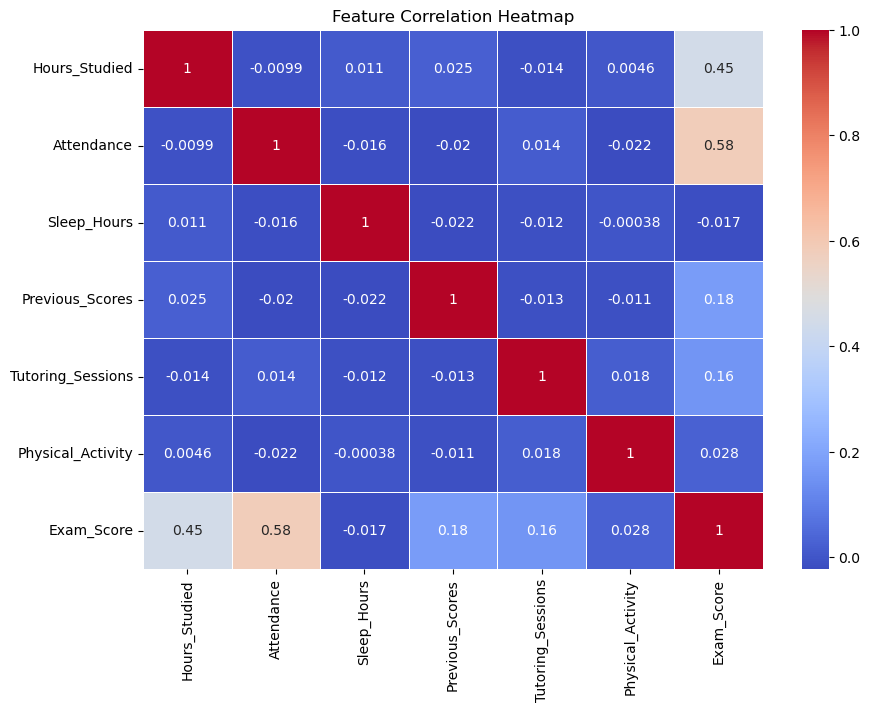

In [12]:
# Correlation Heatmap
# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

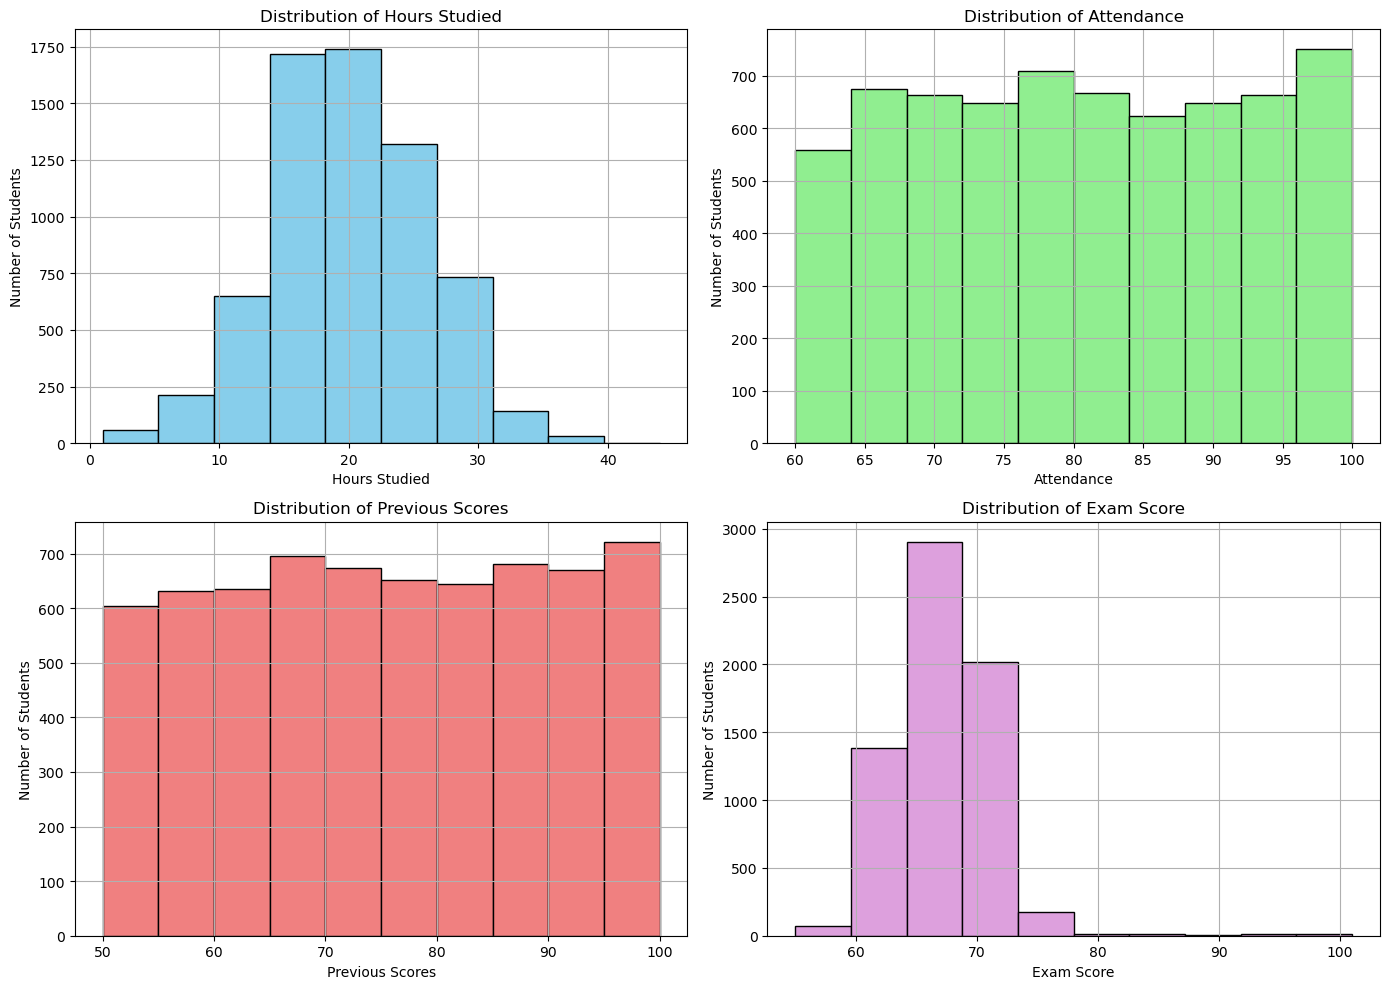

In [12]:
import matplotlib.pyplot as plt

features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'plum']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    plt.hist(df[feature], bins=10, color=colors[i], edgecolor='black')
    plt.title(f'Distribution of {feature.replace("_", " ")}')
    plt.xlabel(feature.replace("_", " "))
    plt.ylabel("Number of Students")
    plt.grid(True)

plt.tight_layout()
plt.show()


### Pie chart by Gender

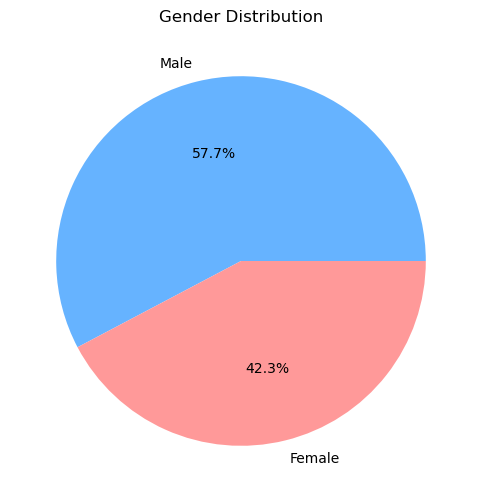

In [13]:
 if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
    plt.title("Gender Distribution")
    plt.show()

### Group by Attendance Levels

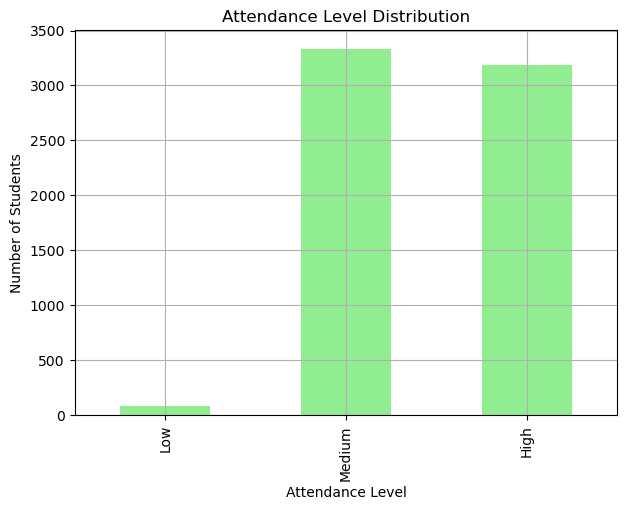

In [14]:
# Group by Attendance Levels
attendance_bins = pd.cut(df['Attendance'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(7,5))
attendance_bins.value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Attendance Level Distribution")
plt.xlabel("Attendance Level")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

### Group by Hours Studied

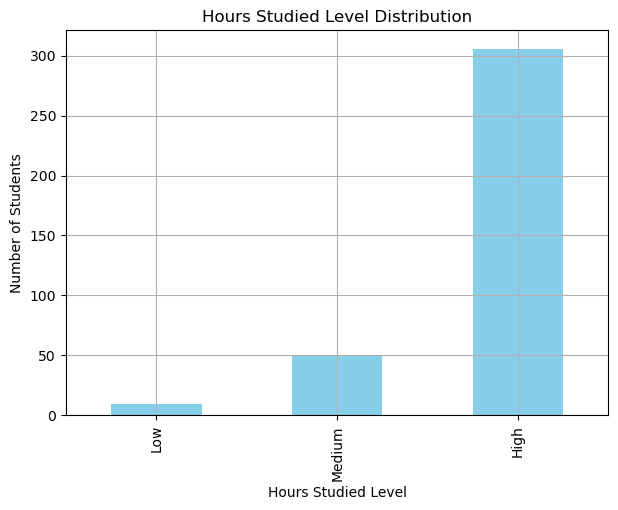

In [16]:
# Group by Hours Studied
study_bins = pd.cut(df['Hours_Studied'], bins=[0, 2, 5, 10], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(7,5))
study_bins.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Hours Studied Level Distribution")
plt.xlabel("Hours Studied Level")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


### Create attendance and study hour levels

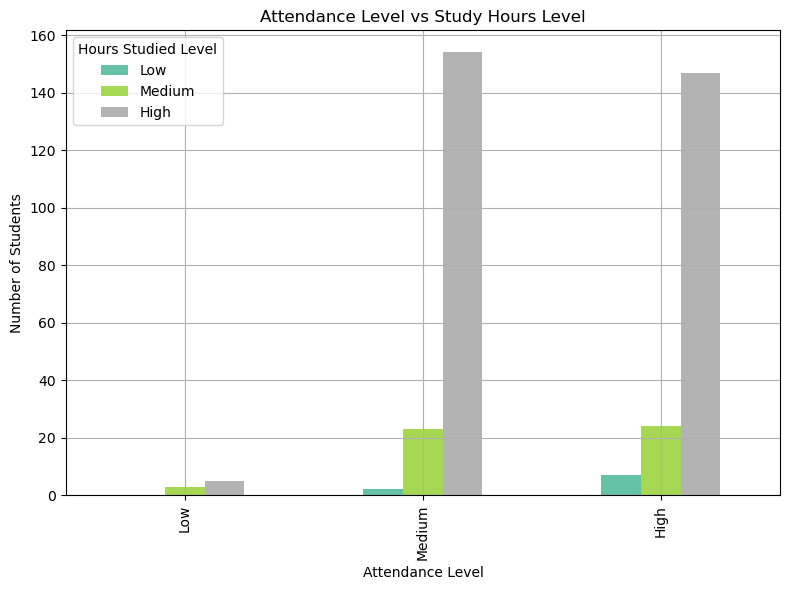

In [17]:
# Create attendance and study hour levels
attendance_bins = pd.cut(df['Attendance'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])
study_bins = pd.cut(df['Hours_Studied'], bins=[0, 2, 5, 10], labels=['Low', 'Medium', 'High'])

# Create a cross-tab of both
grouped = pd.crosstab(attendance_bins, study_bins)

# Plot
grouped.plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title("Attendance Level vs Study Hours Level")
plt.xlabel("Attendance Level")
plt.ylabel("Number of Students")
plt.legend(title='Hours Studied Level')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pairplot

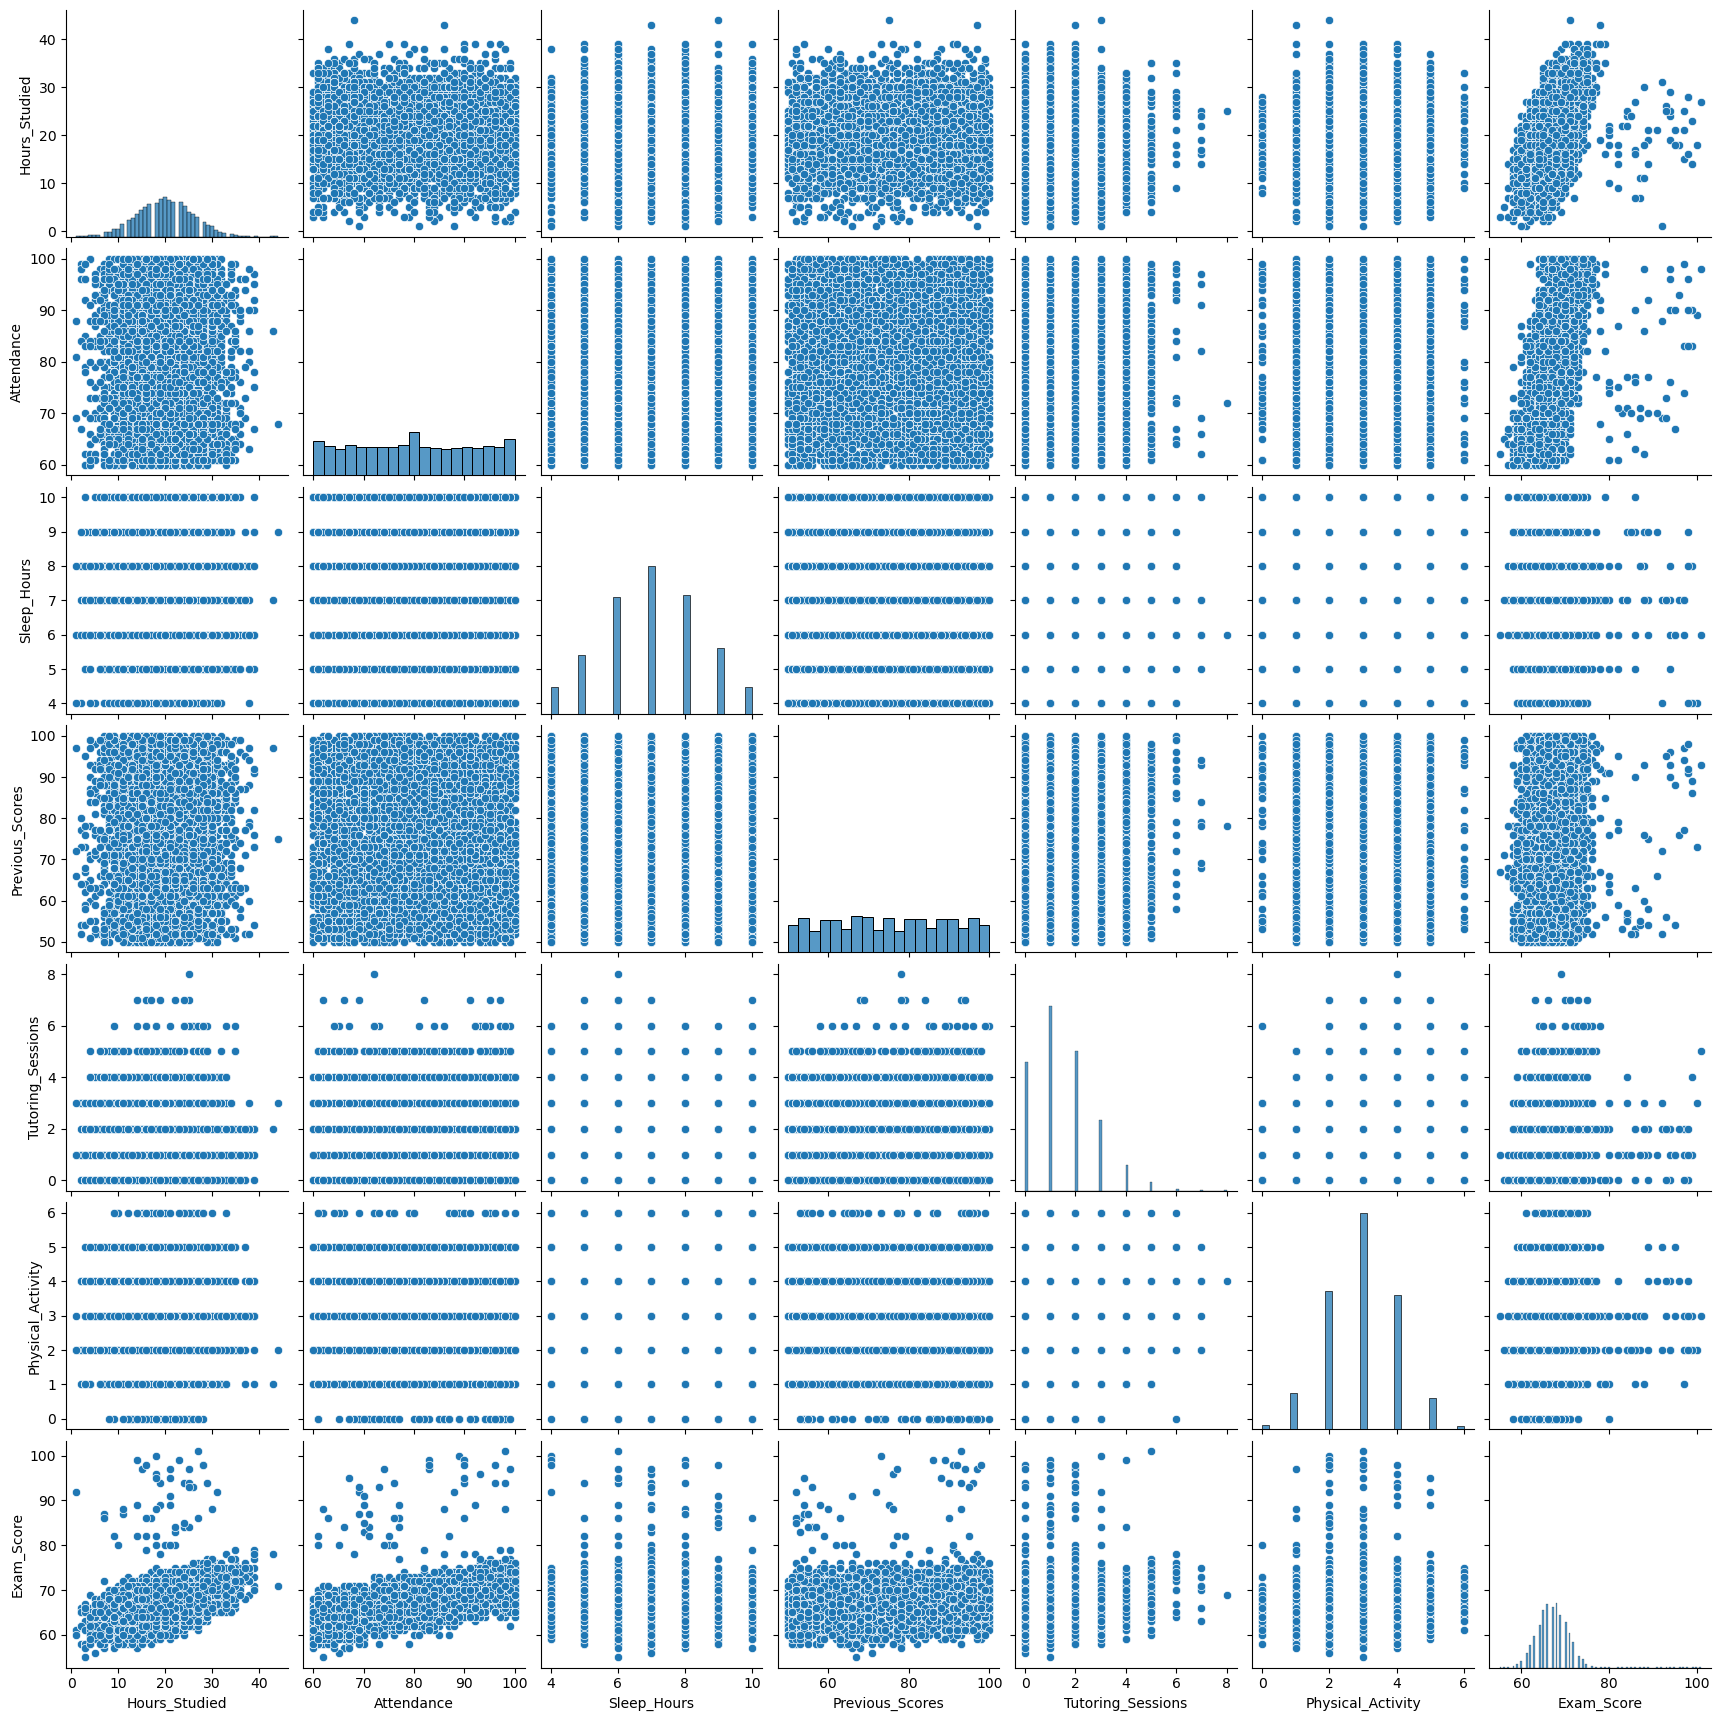

In [18]:
# Pairplot
sns.pairplot(df)
plt.show()

### Feature Engineering

In [19]:
# Add new useful features
df["EngagementScore"] = (df["Hours_Studied"] * 0.5 + df["Attendance"] * 0.5)
df["ImprovementGap"] = 100 - df["Previous_Scores"]
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,EngagementScore,ImprovementGap
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,High School,Near,Male,67,53.5,27
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,College,Moderate,Female,61,41.5,41
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Postgraduate,Near,Male,74,61.0,9
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,High School,Moderate,Male,71,59.0,2
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,College,Near,Female,70,55.5,35


### Feature Selection (Split into Features (X) and Target (y))

In [20]:
# Feature selection
X = df[['Hours_Studied', 'Previous_Scores', 'Attendance']]
y = df['Exam_Score']

### Histograms for each feature    

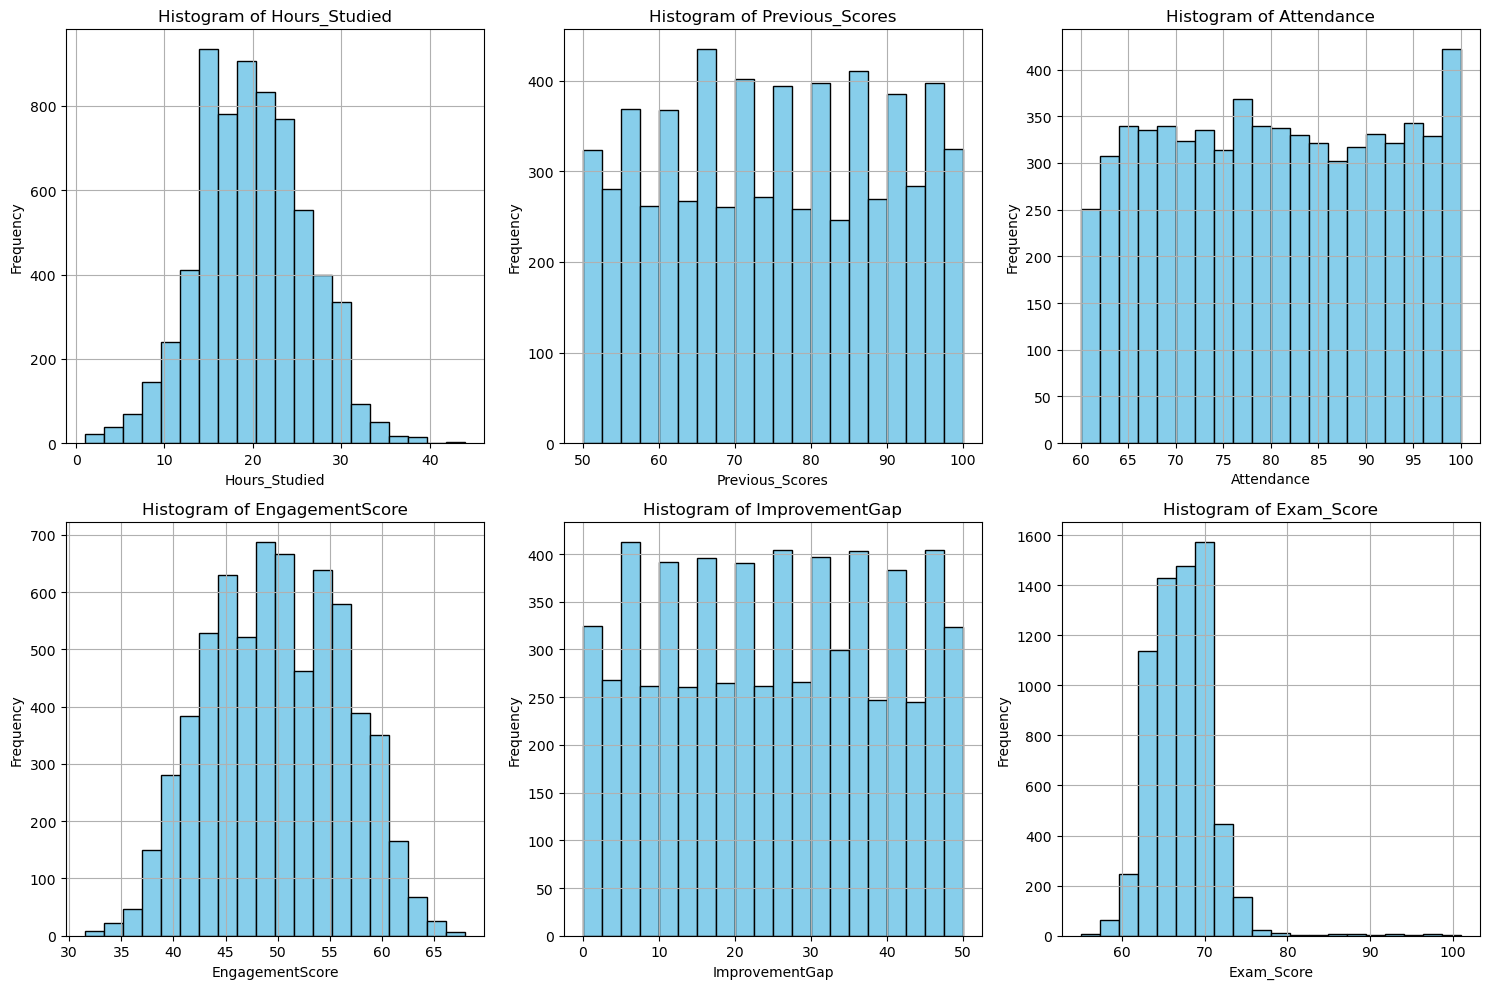

In [21]:
import matplotlib.pyplot as plt

# Select numeric columns to plot
numeric_cols = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'EngagementScore', 'ImprovementGap', 'Exam_Score']

# Set up the layout
plt.figure(figsize=(15, 10))

# Plot each column
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Train Test Split ( Split Dataset into Training and Testing Sets)

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))



Linear Regression R² Score: 0.6223383752199567
MSE: 5.338274436557907


### Model Evaluation

__Train the Algorithm (Linear Regression)__

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate best model (example: Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [25]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))

Ridge R²: 0.622338287465322


In [26]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Lasso R²: 0.6179300728973667


In [27]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest R²: 0.49783676127966336


###  Evaluating our model to see how different algorithm works well with different dataset

__Linear Regression__

In [28]:
# Evaluating our model to see how different algorithm works well with different dataset
# Linear Regression
scores = model.score(X_test, y_test)
print(f"Testing Accuracy: {round((scores * 100), 2)}%")


Testing Accuracy: 62.23%


__Ridge__

In [29]:
# Evaluating our model to see how different algorithm works well with different dataset
# Ridge
scores = ridge.score(X_test, y_test)
print(f"Testing Accuracy: {round((scores * 100), 2)}%")


Testing Accuracy: 62.23%


__Lasso__

In [30]:
# Evaluating our model to see how different algorithm works well with different dataset
# Lasso
scores = lasso.score(X_test, y_test)
print(f"Testing Accuracy: {round((scores * 100), 2)}%")


Testing Accuracy: 61.79%


__Random Forest__

In [31]:
# Evaluating our model to see how different algorithm works well with different dataset
## Random Forest 
scores = rf.score(X_test, y_test)
print(f"Testing Accuracy: {round((scores * 100), 2)}%")


Testing Accuracy: 49.78%


__Evaluate Model Performance__

In [32]:
# Metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.36
Root Mean Squared Error (RMSE): 2.31
R² Score: 0.62


### Comparing with different regression models

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
results_df.sort_values(by="R2 Score", ascending=False)


,Model,MSE,R2 Score
0,Linear Regression,5.338274,0.622338
1,Ridge,5.338276,0.622338
2,Lasso,5.400586,0.617930
3,Random Forest,6.904743,0.511517


__So, from the model evaluation we select Linear Regression as a best model for this__

### Predictions with different visualization graphs

### Hours_Studied and calculate average of Previous_Scores (Line Graph)

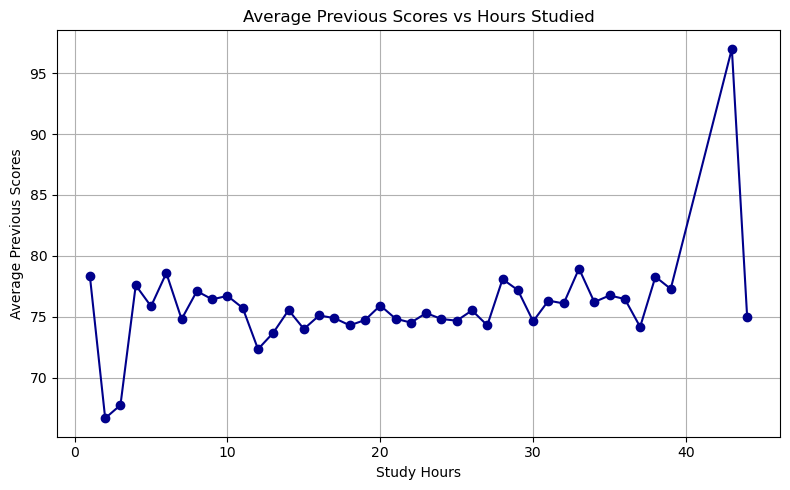

In [35]:
# Group by Hours_Studied and calculate average of Previous_Scores
performance_by_hours = df.groupby('Hours_Studied')['Previous_Scores'].mean().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
performance_by_hours.plot(kind='line', marker='o', color='darkblue')
plt.title("Average Previous Scores vs Hours Studied")
plt.xlabel("Study Hours")
plt.ylabel("Average Previous Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


### Line Plot of Actual vs Predicted Exam Scores

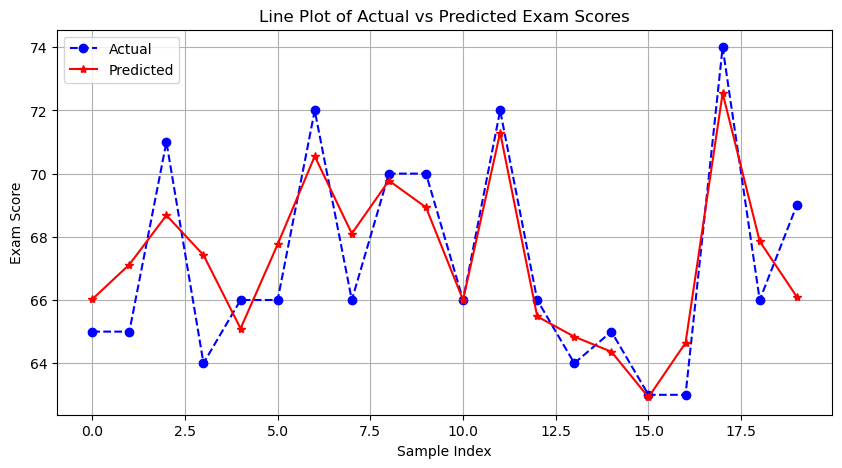

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_lr[:20], label='Predicted', marker='*', linestyle='-', color='red')
plt.title("Line Plot of Actual vs Predicted Exam Scores")
plt.xlabel("Sample Index")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()


### Residual Plot

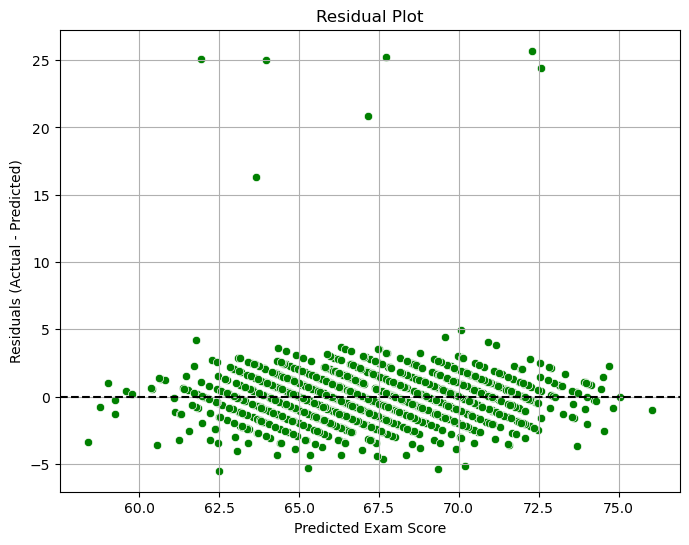

In [39]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_lr, y=residuals, color='green')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


R2 Score: 0.6223383752199567
MSE: 5.338274436557907


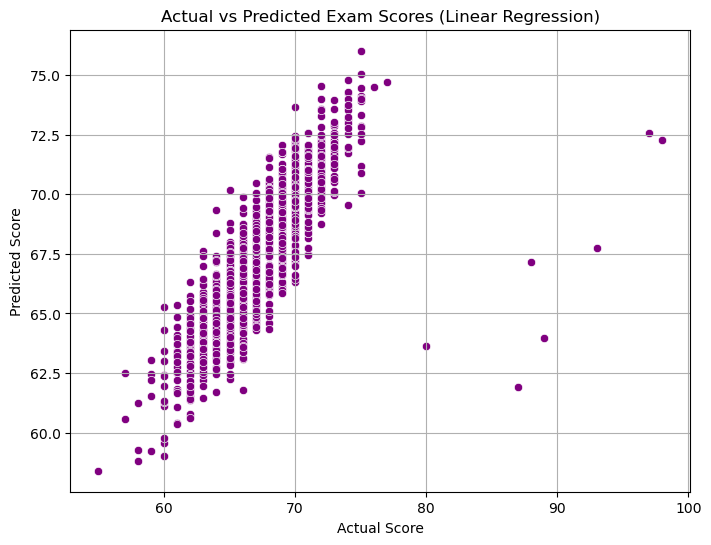

In [50]:
y_pred_lr = lr_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='purple')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.grid(True)
plt.show()



### Feature Coefficients

In [39]:
# Feature Coefficients
coeffs = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
Hours_Studied,0.287498
Previous_Scores,0.047464
Attendance,0.199134


### If a student studies for 7 hours, had previous score 75 and 80% attendance, predicted score will be:

In [44]:
input_data = pd.DataFrame([[7, 75, 80]], columns=['Hours_Studied', 'Previous_Scores', 'Attendance'])
student_score = model.predict(input_data)[0]
print(f'If a student studies for 7 hours, had previous score 75 and 80% attendance, predicted score is: {round(student_score, 2)}%')


If a student studies for 7 hours, had previous score 75 and 80% attendance, predicted score is: 63.36%


### Show last prediction and actual value

In [45]:
# Show last prediction and actual value
print("Predicted score: {:.2f}".format(predictions[-1]))
print("Actual score: {:.2f}".format(y_test.values[-1]))


Predicted score: 70.50
Actual score: 72.00


In [46]:
# Reset index to align actual and predicted
comparison_df = pd.DataFrame({
    "Original Score": y_test.values,
    "Predicted Score": predictions
})

# Optional: Round values for neat display
comparison_df = comparison_df.round(2)

comparison_df


,Original Score,Predicted Score
0,65,66.02
1,65,67.12
2,71,68.68
3,64,67.42
4,66,65.10
...,...,...
1317,69,67.32
1318,72,72.06
1319,66,65.85
1320,63,65.55


### View the test input features ( study hours, previous score, attendance)

In [47]:
# View the test input features (e.g., study hours, attendance, etc.)
print("Test Input Features:")
print(X_test)

# Predict using the trained model 
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted scores
results_df = pd.DataFrame({
    'StudyHours': X_test['Hours_Studied'].values,
    'Actual Score': y_test.values,
    'Predicted Score': y_pred
})

results_df = results_df.round(2)

# Show the comparison
print("Actual vs Predicted Scores:")
print(results_df.head())


Test Input Features:
      Hours_Studied  Previous_Scores  Attendance
743              20               87          71
5551             22               98          71
3442             21               53          91
6571             12               81          91
4204             21               95          63
...             ...              ...         ...
4709             20               85          78
3664             27               92          90
5231             23               61          72
1773             21               50          76
5782             23               96          87

[1322 rows x 3 columns]
Actual vs Predicted Scores:
   StudyHours  Actual Score  Predicted Score
0          20            65            65.64
1          22            65            66.66
2          21            71            69.74
3          12            64            67.04
4          21            66            66.16


### Show all predictions as a column

In [48]:
import pandas as pd

df_preds = pd.DataFrame(predictions, columns=['Predicted Score'])
print(df_preds)


      Predicted Score
0           66.024226
1           67.121322
2           68.680647
3           67.422149
4           65.098357
...               ...
1317        67.323239
1318        72.057584
1319        65.851798
1320        65.551240
1321        70.500044

[1322 rows x 1 columns]


### Actual vs Predicted Scatter plot

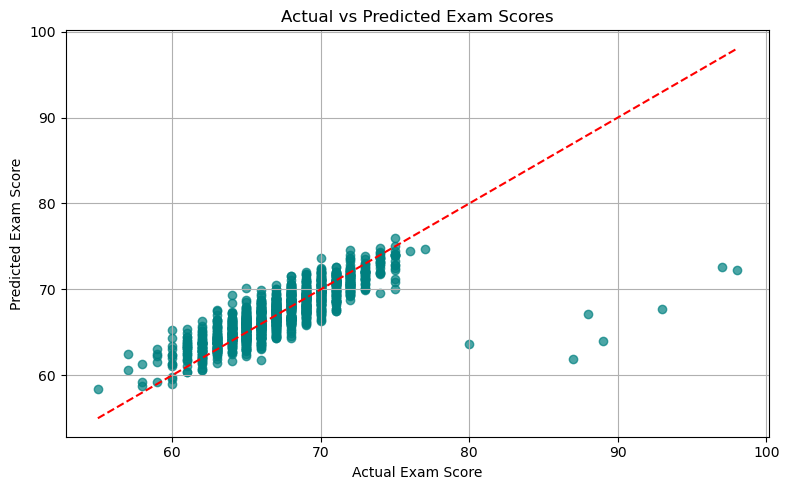

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion


- The best model was able to predict student exam scores with reasonable accuracy.
- Attendance and study hours had a strong positive influence.
- Engagement Score and Improvement Gap are meaningful engineered features.
- Additional data like study habits, learning style, or teacher feedback may enhance performance.
